In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Esercitazione 10</span>

### Esercizio 10.1

Si consideri un sistema governato dalla distribuzione di Boltzmann
$$
p(x_1,..,x_N)=\frac{e^{-\beta E(x_1,..,x_N)}}{Z}
$$
È noto che diminuendo la temperatura, l'energia $E(x_1,..,x_N)$ diminuisce fino a raggiungere il suo minimo globale.<br>
La decrescita della temperatura deve essere dolce e graduale in modo da non creare delle discontinuità all'interno del sistema (e.g. cristalli amorfi).

Il nocciolo della tecnica Simulated annealing è di identificare l'energia del sistema precedentemente descritto con la funzione costo che si vuole minimizzare.<br>
In tale esercizio si vuole risolvere attraverso questa tecnica il problema del commesso viaggiatore dove quindi
$$
E(x_1,..,x_N)=L^{(2)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N) = \sum_{i=1}^{N} |\vec{x}_i-\vec{x}_{i+1}|^2
$$

All'inizio della simulazione si generano $N$ città distribuite a caso (sulla circonferenza o nel quadrato). <br>
Si individua un set di coppie $ (\beta_1, n_1),(\beta_2, n_2)..,(\beta_{max}, n_{max}) $ dove $\beta_i=\large \frac{1}{T_i}$ è la componente i-esima del vettore delle temperature, $n_i$ indica il numero di passi a fissata temperatura.<brNella mia simulazione ho preso tutti gli $n$ uguali. <br>
In ogni passo dell'algoritmo vengono generati diversi percorsi ciascuno dei quali potrà essere accettato o rigettato dall'algoritmo di Metropolis.  Tale meccanismo è ripetuto $n_i$ volte a fissata $T_i$ fino ad arrivare alla temperatura minima.

Si riportano i risultati delle simulazioni con i seguenti parametri 
- 30 città distribuite in modo casuale su una circonferenza
- 30 città distribuite in modo casuale all'interno di un rettangolo

I grafici sottostanti mostrano la distanza ottenuta al variare della temperatura. 
Il valore della distanza presa è l'ultima del sottoinsieme $(\beta_i,n_i)$. <br>
Per quanto riguarda la circonferenza, si osserva che il risultato ottenuto è quello corretto poichè il percorso minimo è $2\pi$. <br>
Nel secondo caso si osserva una cosa molto interessante: la minima distanza ottenuta nella scorsa esercitazione è più grande di quella ottenuta questa volta! Questo mi conferma il fatto che il risultato precedentemente trovato è un minimo locale poichè la tecnica utilizzata garantisce la convergenza verso il minimo globale.


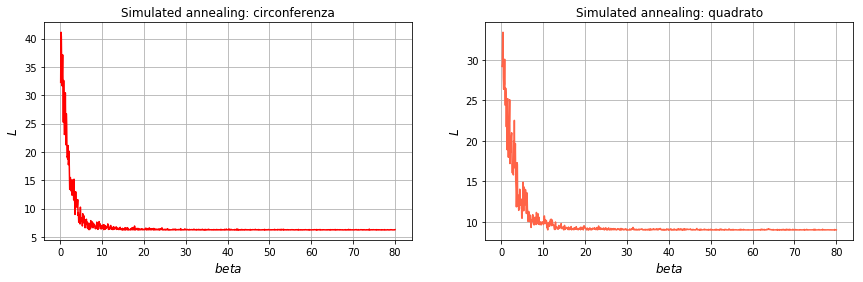

In [5]:
fig, (f1, f2) = plt.subplots(1,2,figsize=(14.5,4))
x,y = np.loadtxt("./Es10.1./Circonferenza/Distanza-beta.dat", usecols=(0,1), delimiter=' ', unpack='true')
f1.plot(x,y,color="r")
f1.set_ylabel("$L$", fontsize=12)
f1.set_xlabel("$beta$", fontsize=12)
f1.set_title("Simulated annealing: circonferenza")
f1.grid(True)

x,y = np.loadtxt("./Es10.1./Quadrato/Distanza-beta.dat", usecols=(0,1), delimiter=' ', unpack='true')
f2.plot(x,y,color="tomato")
f2.set_ylabel("$L$", fontsize=12)
f2.set_xlabel("$beta$", fontsize=12)
f2.set_title("Simulated annealing: quadrato")
f2.grid(True)

plt.show()

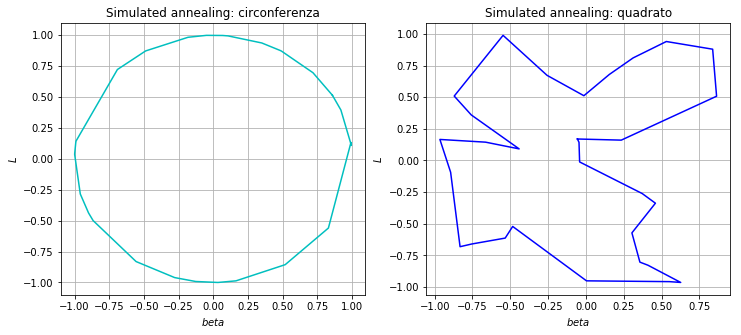

In [10]:
fig, (f1, f2) = plt.subplots(1,2,figsize=(12,5))
x,y = np.loadtxt("./Es10.1./Circonferenza/distanza.dat", usecols=(0,1), delimiter=' ', unpack='true')
f1.plot(x,y,color="c")
f1.set_ylabel("$L$")
f1.set_xlabel("$beta$")
f1.set_title("Simulated annealing: circonferenza")
f1.grid(True)

x,y = np.loadtxt("./Es10.1./Quadrato/distanza.dat", usecols=(0,1), delimiter=' ', unpack='true')
f2.plot(x,y,color="b")
f2.set_ylabel("$L$")
f2.set_xlabel("$beta$")
f2.set_title("Simulated annealing: quadrato")
f2.grid(True)

plt.show()

### Esercizio 10.2

Attraverso il calcolo parallelo è possibile implementare la tecnica "Simulated annealing" per risolvere il problema del commesso viaggiatore. <br>
Tale calcolo permette di utilizzare diversi core ciascuno dei quali lavora sullo stesso codice. <br>
Ogni sistema avrà lo stesso generatore di numeri casuali ma con parametri diversi. Attraverso le librerie MPI, i vari codici potranno condividere informazioni.
Una volta che il Simulated annealing è terminato, si confrontano i risultati finali per cercare il minimo dei minimi per poi salvare i risultati del rank migliore.
